In [3]:
import numpy
import pandas as pd


Link to dataset: https://www.kaggle.com/datasets/pablollanderos33/world-cup-penalty-shootouts?resource=download

The dataset was built by watching every  penalty kick in a World Cup Shootout from  1982 to 2018.



Information recorded:
- Where the shot was taken. To do this, I divided the goal in 9 different zones.
- Whether the shooter was left or right footed.
- Where did the keeper dive.
- Whether the shot was on target or not.
- Whether the shot went in or not.
- The penalty number in each series.
- Whether or not the penalty was for elimination. This where the cases when, if the shot went in, the Game was over or the cases where a miss would end the game.

How the goal was divided:
In the Zone column, I goal is divided into 9 different sections:

- Upper left corner
- Upper center
- Upper right corner
- Middle left area
- Middle center area
- Middle right area
- Bottom left corner
- Bottom center zone
- Bottom right corner

## Part 1
This section is simply to clean the dataset, and only use the rows and columns that matter for our use case.

In [4]:
df= pd.read_csv('WorldCupShootouts.csv')
df

,Game_id,Team,Zone,Foot,Keeper,OnTarget,Goal,Penalty_Number,Elimination
0,1,FRA,7.0,R,R,1.0,1.0,1,0.0
1,1,GER,9.0,R,C,1.0,1.0,2,0.0
2,1,FRA,6.0,R,L,1.0,1.0,3,0.0
3,1,GER,2.0,R,C,1.0,1.0,4,0.0
4,1,FRA,9.0,R,L,1.0,1.0,5,0.0
...,...,...,...,...,...,...,...,...,...
299,30,CRO,7.0,R,L,1.0,1.0,6,0.0
300,30,RUS,7.0,R,R,1.0,1.0,7,0.0
301,30,CRO,4.0,R,R,1.0,1.0,8,0.0
302,30,RUS,7.0,R,R,1.0,1.0,9,1.0


In [5]:
df.columns.unique

<bound method Index.unique of Index(['Game_id', 'Team', 'Zone', 'Foot', 'Keeper', 'OnTarget', 'Goal',
       'Penalty_Number', 'Elimination'],
      dtype='object')>

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Game_id         304 non-null    int64  
 1   Team            304 non-null    object 
 2   Zone            279 non-null    float64
 3   Foot            279 non-null    object 
 4   Keeper          279 non-null    object 
 5   OnTarget        279 non-null    float64
 6   Goal            279 non-null    float64
 7   Penalty_Number  304 non-null    int64  
 8   Elimination     280 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 21.5+ KB


In [7]:
# Get the count of unique values for categorical columns
#df['Team'].value_counts()
df['Zone'].value_counts()
#df['Foot'].value_counts()
#df['Keeper'].value_counts()


7.0    63
9.0    46
4.0    36
6.0    33
1.0    28
8.0    20
2.0    19
5.0    18
3.0    16
Name: Zone, dtype: int64

In [11]:
# Create a list of the desired zones
desired_zones = [1, 4, 7, 3, 6, 9]

# Filter the dataframe to only include rows with the desired zones
new_df = df[df['Zone'].isin(desired_zones)]
new_df = new_df[['Zone', 'Foot', 'Keeper', 'Goal']]

#Create list of desired sides
desired_gk_sides= ['R','L']
new_df = new_df[new_df['Keeper'].isin(desired_gk_sides)]


# Create a new column 'LeftRight' based on the 'Zone' column
new_df['Shoot Left or Right'] = new_df['Zone'].apply(lambda x: 'L' if x in [1, 4, 7] else 'R')
new_df = new_df[['Shoot Left or Right', 'Foot', 'Keeper', 'Goal']]

#Reset index
new_df= new_df.reset_index(drop=True)

# View the new dataframe
display(new_df)


,Shoot Left or Right,Foot,Keeper,Goal
0,L,R,R,1.0
1,R,R,L,1.0
2,R,R,L,1.0
3,L,R,L,0.0
4,R,R,R,1.0
...,...,...,...,...
187,L,R,L,1.0
188,L,R,R,1.0
189,L,R,R,1.0
190,L,R,R,1.0


In [12]:
new_df

,Shoot Left or Right,Foot,Keeper,Goal
0,L,R,R,1.0
1,R,R,L,1.0
2,R,R,L,1.0
3,L,R,L,0.0
4,R,R,R,1.0
...,...,...,...,...
187,L,R,L,1.0
188,L,R,R,1.0
189,L,R,R,1.0
190,L,R,R,1.0


In [13]:
#Percentage of right footed versus left footed players
r = new_df[new_df['Foot'] == 'R'].value_counts()
l = new_df[new_df['Foot'] == 'L'].value_counts()
perc = r / (r + l)
perc = (new_df['Foot'] == 'R').mean() * 100
perc

80.20833333333334

## Part 2

This part is the section where I found the payoffs for each type of striker, and goalkeeper.

In [15]:
# (being right footed. shooting right, GK diving right, scoring)
count_right_shoot_right_gk_right_score = new_df[(new_df['Foot'] == 'R') & (new_df['Shoot Left or Right'] == 'R') & (new_df['Keeper'] == 'R') & (new_df['Goal'] == 1)].shape[0]
print("(being right footed. shooting right, GK diving right, scoring):",count_right_shoot_right_gk_right_score)

# (being right footed. shooting right, GK diving right, missing)
count_right_shoot_right_gk_right_miss = new_df[(new_df['Foot'] == 'R') & (new_df['Shoot Left or Right'] == 'R') & (new_df['Keeper'] == 'R') & (new_df['Goal'] == 0)].shape[0]
print("(being right footed. shooting right, GK diving right, missing):",count_right_shoot_right_gk_right_miss)

# (being right footed. shooting right, GK diving right)
count_right_shoot_right_gk_right = count_right_shoot_right_gk_right_score+ count_right_shoot_right_gk_right_miss
print("(being right footed. shooting right, GK diving right):",count_right_shoot_right_gk_right)

#Probability
prob_right_shoot_right_gk_right_score= round(count_right_shoot_right_gk_right_score/count_right_shoot_right_gk_right,2)
prob_right_shoot_right_gk_right_miss=round(1-prob_right_shoot_right_gk_right_score,2)
print("Probability of scoring:",prob_right_shoot_right_gk_right_score)
print("Probability of missing:",prob_right_shoot_right_gk_right_miss)


(being right footed. shooting right, GK diving right, scoring): 19
(being right footed. shooting right, GK diving right, missing): 15
(being right footed. shooting right, GK diving right): 34
Probability of scoring: 0.56
Probability of missing: 0.44


In [16]:
# (being right footed. shooting left, GK diving right, scoring)
count_right_shoot_left_gk_right_score = new_df[(new_df['Foot'] == 'R') & (new_df['Shoot Left or Right'] == 'L') & (new_df['Keeper'] == 'R') & (new_df['Goal'] == 1)].shape[0]
print("(being right footed. shooting left, GK diving right, scoring):",count_right_shoot_left_gk_right_score)

# (being right footed. shooting left, GK diving right, missing)
count_right_shoot_left_gk_right_miss = new_df[(new_df['Foot'] == 'R') & (new_df['Shoot Left or Right'] == 'L') & (new_df['Keeper'] == 'R') & (new_df['Goal'] == 0)].shape[0]
print("(being right footed. shooting left, GK diving right, missing):",count_right_shoot_left_gk_right_miss)

# (being right footed. shooting left, GK diving right)
count_right_shoot_left_gk_right = count_right_shoot_left_gk_right_score+ count_right_shoot_left_gk_right_miss
print("(being right footed. shooting left, GK diving right):",count_right_shoot_left_gk_right)
# Probability
prob_right_shoot_left_gk_right_score= round(count_right_shoot_left_gk_right_score/count_right_shoot_left_gk_right,2)
prob_right_shoot_left_gk_right_miss=1-prob_right_shoot_left_gk_right_score
print("Probability of scoring:",prob_right_shoot_left_gk_right_score)
print("Probability of missing:",prob_right_shoot_left_gk_right_miss)



(being right footed. shooting left, GK diving right, scoring): 29
(being right footed. shooting left, GK diving right, missing): 4
(being right footed. shooting left, GK diving right): 33
Probability of scoring: 0.88
Probability of missing: 0.12


In [17]:
# (being right footed. shooting right, GK diving left, scoring)
count_right_shoot_right_gk_left_score = new_df[(new_df['Foot'] == 'R') & (new_df['Shoot Left or Right'] == 'R') & (new_df['Keeper'] == 'L') & (new_df['Goal'] == 1)].shape[0]
print("(being right footed. shooting right, GK diving left, scoring):",count_right_shoot_right_gk_left_score)
# (being right footed. shooting right, GK diving left, missing)
count_right_shoot_right_gk_left_miss = new_df[(new_df['Foot'] == 'R') & (new_df['Shoot Left or Right'] == 'R') & (new_df['Keeper'] == 'L') & (new_df['Goal'] == 0)].shape[0]
print("(being right footed. shooting right, GK diving left, missing):",count_right_shoot_right_gk_left_miss)
# (being right footed. shooting right, GK diving left)
count_right_shoot_right_gk_left = count_right_shoot_left_gk_right_score+ count_right_shoot_left_gk_right_miss
print("(being right footed. shooting right, GK diving left):",count_right_shoot_right_gk_left)
# Probability
prob_right_shoot_right_gk_left_score= round(count_right_shoot_right_gk_left_score/count_right_shoot_right_gk_left,2)
prob_right_shoot_right_gk_left_miss=round(1-prob_right_shoot_right_gk_left_score,2)
print("Probability of scoring:",prob_right_shoot_right_gk_left_score)
print("Probability of missing:",prob_right_shoot_right_gk_left_miss)

(being right footed. shooting right, GK diving left, scoring): 23
(being right footed. shooting right, GK diving left, missing): 1
(being right footed. shooting right, GK diving left): 33
Probability of scoring: 0.7
Probability of missing: 0.3


In [18]:
# (being right footed. shooting left, GK diving left, scoring)
count_right_shoot_left_gk_left_score = new_df[(new_df['Foot'] == 'R') & (new_df['Shoot Left or Right'] == 'L') & (new_df['Keeper'] == 'L') & (new_df['Goal'] == 1)].shape[0]
print("(being right footed. shooting left, GK diving left, scoring):",count_right_shoot_left_gk_left_score)
# (being right footed. shooting left, GK diving left, missing)
count_right_shoot_left_gk_left_miss = new_df[(new_df['Foot'] == 'R') & (new_df['Shoot Left or Right'] == 'L') & (new_df['Keeper'] == 'L') & (new_df['Goal'] == 0)].shape[0]
print("(being right footed. shooting left, GK diving left, missing):",count_right_shoot_left_gk_left_miss)
# (being right footed. shooting left, GK diving left)
count_right_shoot_left_gk_left = count_right_shoot_left_gk_left_score + count_right_shoot_left_gk_left_miss
print("(being right footed. shooting left, GK diving left):",count_right_shoot_left_gk_left)
# Probability
prob_right_shoot_left_gk_left_score= round(count_right_shoot_left_gk_left_score/count_right_shoot_left_gk_left,2)
prob_right_shoot_left_gk_left_miss=round(1-prob_right_shoot_left_gk_left_score,2)
print("Probability of scoring:",prob_right_shoot_left_gk_left_score)
print("Probability of missing:",prob_right_shoot_left_gk_left_miss)

(being right footed. shooting left, GK diving left, scoring): 37
(being right footed. shooting left, GK diving left, missing): 26
(being right footed. shooting left, GK diving left): 63
Probability of scoring: 0.59
Probability of missing: 0.41


In [19]:
# (being left footed. shooting right, GK diving right, scoring)
count_left_shoot_right_gk_right_score = new_df[(new_df['Foot'] == 'L') & (new_df['Shoot Left or Right'] == 'R') & (new_df['Keeper'] == 'R') & (new_df['Goal'] == 1)].shape[0]
print("(being left footed. shooting right, GK diving right, scoring):",count_left_shoot_right_gk_right_score)
# (being left footed. shooting right, GK diving right, missing)
count_left_shoot_right_gk_right_miss = new_df[(new_df['Foot'] == 'L') & (new_df['Shoot Left or Right'] == 'R') & (new_df['Keeper'] == 'R') & (new_df['Goal'] == 0)].shape[0]
print("(being left footed. shooting right, GK diving right, missing):",count_left_shoot_right_gk_right_miss)
# (being left footed. shooting right, GK diving right)
count_left_shoot_right_gk_right = count_left_shoot_right_gk_right_score+ count_left_shoot_right_gk_right_miss
print("(being left footed. shooting right, GK diving right):",count_left_shoot_right_gk_right)
# Probability
prob_left_shoot_right_gk_right_score= round(count_left_shoot_right_gk_right_score/count_left_shoot_right_gk_right,2)
prob_left_shoot_right_gk_right_miss=round(1-prob_left_shoot_right_gk_right_score,2)
print("Probability of scoring:",prob_left_shoot_right_gk_right_score)
print("Probability of missing:",prob_left_shoot_right_gk_right_miss)

(being left footed. shooting right, GK diving right, scoring): 8
(being left footed. shooting right, GK diving right, missing): 5
(being left footed. shooting right, GK diving right): 13
Probability of scoring: 0.62
Probability of missing: 0.38


In [20]:
# (being left footed. shooting left, GK diving right, scoring)
count_left_shoot_left_gk_right_score = new_df[(new_df['Foot'] == 'L') & (new_df['Shoot Left or Right'] == 'L') & (new_df['Keeper'] == 'R') & (new_df['Goal'] == 1)].shape[0]
print("(being left footed. shooting left, GK diving right, scoring):",count_left_shoot_left_gk_right_score)
# (being left footed. shooting left, GK diving right, missing)
count_left_shoot_left_gk_right_miss = new_df[(new_df['Foot'] == 'L') & (new_df['Shoot Left or Right'] == 'L') & (new_df['Keeper'] == 'R') & (new_df['Goal'] == 0)].shape[0]
print("(being left footed. shooting left, GK diving right, missing):",count_left_shoot_left_gk_right_miss)
# (being left footed. shooting left, GK diving right)
count_left_shoot_left_gk_right = count_left_shoot_left_gk_right_score + count_left_shoot_left_gk_right_miss
print("(being left footed. shooting left, GK diving right):",count_left_shoot_left_gk_right)
# Probability
prob_left_shoot_left_gk_right_score= round(count_left_shoot_left_gk_right_score/count_left_shoot_left_gk_right,2)
prob_left_shoot_left_gk_right_miss=round(1-prob_left_shoot_left_gk_right_score,2)
print("Probability of scoring:",prob_left_shoot_left_gk_right_score)
print("Probability of missing:",prob_left_shoot_left_gk_right_miss)

(being left footed. shooting left, GK diving right, scoring): 8
(being left footed. shooting left, GK diving right, missing): 1
(being left footed. shooting left, GK diving right): 9
Probability of scoring: 0.89
Probability of missing: 0.11


In [21]:
# (being left footed. shooting right, GK diving left, scoring)
count_left_shoot_right_gk_left_score = new_df[(new_df['Foot'] == 'L') & (new_df['Shoot Left or Right'] == 'R') & (new_df['Keeper'] == 'L') & (new_df['Goal'] == 1)].shape[0]
print("(being left footed. shooting right, GK diving left, scoring):",count_left_shoot_right_gk_left_score)
# (being left footed. shooting right, GK diving left, missing)
count_left_shoot_right_gk_left_miss = new_df[(new_df['Foot'] == 'L') & (new_df['Shoot Left or Right'] == 'R') & (new_df['Keeper'] == 'L') & (new_df['Goal'] == 0)].shape[0]
print("(being left footed. shooting right, GK diving left, missing):",count_left_shoot_right_gk_left_miss)
# (being left footed. shooting right, GK diving left)
count_left_shoot_right_gk_left = count_left_shoot_right_gk_left_score+ count_left_shoot_right_gk_left_miss
print("(being left footed. shooting right, GK diving left):",count_left_shoot_right_gk_left)

# Probability
prob_left_shoot_right_gk_left_score= round(count_left_shoot_right_gk_left_score/count_left_shoot_right_gk_left,2)
prob_left_shoot_right_gk_left_miss=round(1-prob_left_shoot_right_gk_left_score,2)
print("Probability of scoring:",prob_left_shoot_right_gk_left_score)
print("Probability of missing:",prob_left_shoot_right_gk_left_miss)

(being left footed. shooting right, GK diving left, scoring): 8
(being left footed. shooting right, GK diving left, missing): 0
(being left footed. shooting right, GK diving left): 8
Probability of scoring: 1.0
Probability of missing: 0.0


In [22]:
# (being left footed. shooting left, GK diving left, scoring)
count_left_shoot_left_gk_left_score = new_df[(new_df['Foot'] == 'L') & (new_df['Shoot Left or Right'] == 'L') & (new_df['Keeper'] == 'L') & (new_df['Goal'] == 1)].shape[0]
print("(being left footed. shooting left, GK diving left, scoring):",count_left_shoot_left_gk_left_score)
# (being left footed. shooting left, GK diving left, missing)
count_left_shoot_left_gk_left_miss = new_df[(new_df['Foot'] == 'L') & (new_df['Shoot Left or Right'] == 'L') & (new_df['Keeper'] == 'L') & (new_df['Goal'] == 0)].shape[0]
print("(being left footed. shooting left, GK diving left, missing):",count_left_shoot_left_gk_left_miss)
# (being left footed. shooting left, GK diving left)
count_left_shoot_left_gk_left = count_left_shoot_left_gk_left_score+ count_left_shoot_left_gk_left_miss
print("(being left footed. shooting left, GK diving left):",count_left_shoot_left_gk_left)
# Probability
prob_left_shoot_left_gk_left_score= round(count_left_shoot_left_gk_left_score/count_left_shoot_left_gk_left,2)
prob_left_shoot_left_gk_left_miss=round(1-prob_left_shoot_left_gk_left_score,2)
print("Probability of scoring:",prob_left_shoot_left_gk_left_score)
print("Probability of missing:",prob_left_shoot_left_gk_left_miss)

(being left footed. shooting left, GK diving left, scoring): 3
(being left footed. shooting left, GK diving left, missing): 5
(being left footed. shooting left, GK diving left): 8
Probability of scoring: 0.38
Probability of missing: 0.62


In [23]:
# Calculate the counts for each situation

# Sum all the score counts
total_counts_score = count_right_shoot_right_gk_right_score + count_right_shoot_left_gk_right_score + count_right_shoot_right_gk_left_score + count_right_shoot_left_gk_left_score + count_left_shoot_right_gk_right_score + count_left_shoot_left_gk_right_score + count_left_shoot_right_gk_left_score + count_left_shoot_left_gk_left_score
print("Total counts:",total_counts_score)
# Sum all the score counts for misses
total_counts_miss = count_right_shoot_right_gk_right_miss + count_right_shoot_left_gk_right_miss + count_right_shoot_right_gk_left_miss + count_right_shoot_left_gk_left_miss + count_left_shoot_right_gk_right_miss + count_left_shoot_left_gk_right_miss + count_left_shoot_right_gk_left_miss + count_left_shoot_left_gk_left_miss
print("Total counts:",total_counts_miss)


Total counts: 135
Total counts: 57


## Random Forests

This section is simply some auxillary data analysis I did using random forests. I made a model that predicts whether a players scores or misses a goal based on the columns ['Shoot Left or Right', 'Foot', 'Keeper'].

In [24]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Convert categorical variables to dummy variables
rforestdf=new_df
rforestdf['Shoot Left or Right'] = rforestdf['Shoot Left or Right'].apply(lambda x: 0 if x == 'L' else 1)
rforestdf['Foot'] = rforestdf['Foot'].apply(lambda x: 0 if x == 'L' else 1)
rforestdf['Keeper'] = rforestdf['Keeper'].apply(lambda x: 0 if x == 'L' else 1)

# Split data into features and labels
X = rforestdf[['Shoot Left or Right', 'Foot', 'Keeper']]
y = rforestdf['Goal']



# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the model
model = RandomForestClassifier(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)


Accuracy: 0.717948717948718


In [25]:
rforestdf

,Shoot Left or Right,Foot,Keeper,Goal
0,0,1,1,1.0
1,1,1,0,1.0
2,1,1,0,1.0
3,0,1,0,0.0
4,1,1,1,1.0
...,...,...,...,...
187,0,1,0,1.0
188,0,1,1,1.0
189,0,1,1,1.0
190,0,1,1,1.0


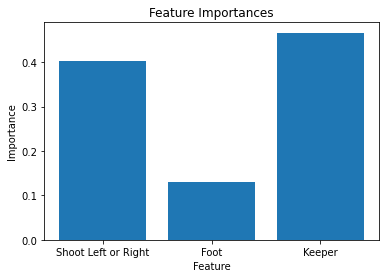

In [26]:
import matplotlib.pyplot as plt

# Get feature importances from the trained model
importances = model.feature_importances_

# Get the names of the features
feature_names = ['Shoot Left or Right', 'Foot', 'Keeper']

# Plot the feature importances
plt.bar(feature_names, importances)
plt.title('Feature Importances')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()